In [1]:
import batoid
import galsim
import yaml
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%autoreload 2

In [2]:
def psfModelComparison(
    telescope, theta_x, theta_y, wavelength,
    nx=64, pad_factor=4, h_factor=8):
    
    # Conversion factors
    dGnomicDX = batoid.psf.dthdr(telescope, theta_x, theta_y, wavelength)
    dSphericalDGnomic = batoid.utils.dSphericalDGnomic(theta_x, theta_y)
    
    # Non-paraxial optics FFT PSF
    npFFTPSF = batoid.fftPSF(telescope, theta_x, theta_y, wavelength, 
                          nx=nx, pad_factor=pad_factor)
    npFFTSphericalPrimitives = np.dot(
        np.dot(
            npFFTPSF.primitiveVectors,
            dGnomicDX
        ),
        dSphericalDGnomic
    ) * galsim.radians/galsim.arcsec  # radians -> arcsec

    # Huygens PSF, using the same grid as for npFFT
    hPSF = batoid.huygensPSF(
        telescope, theta_x, theta_y, wavelength,
        nx=nx, nxOut=nx*pad_factor//h_factor,
        dx=npFFTPSF.primitiveVectors[0]*h_factor,
        dy=npFFTPSF.primitiveVectors[1]*h_factor
    )
    hSphericalPrimitives = np.dot(
        np.dot(
            hPSF.primitiveVectors,
            dGnomicDX
        ),
        dSphericalDGnomic
    ) * galsim.radians/galsim.arcsec
    
    # GalSim PSF, uses same array as fftPSF, but different primitives
    gsSphericalPrimitives = -np.eye(2)*wavelength/pad_factor/telescope.pupilSize
    gsSphericalPrimitives *= galsim.radians/galsim.arcsec
    
    return (batoid.Lattice(npFFTPSF.array, npFFTSphericalPrimitives),
            batoid.Lattice(hPSF.array, hSphericalPrimitives),
            batoid.Lattice(npFFTPSF.array, gsSphericalPrimitives))

In [3]:
lsst = batoid.parse.parse_optic(
    yaml.load(
        open(
            os.path.join(batoid.datadir, 'LSST', 'LSST_r.yaml')
        )
    )['opticalSystem']
)

hsc = batoid.parse.parse_optic(
    yaml.load(
        open(
            os.path.join(batoid.datadir, 'HSC', 'HSC.yaml')
        )
    )['opticalSystem']
)

decam = batoid.parse.parse_optic(
    yaml.load(
        open(
            os.path.join(batoid.datadir, 'DECam', 'DECam.yaml')
        )
    )['opticalSystem']
)

In [5]:
telescope = lsst.withGloballyShiftedOptic('LSST.LSSTCamera', [0,0,1e-3])
fftLattice, hLattice, gsLattice = psfModelComparison(
    telescope, np.deg2rad(1.75), 0.0, 620e-9,
    nx=1536, pad_factor=1, h_factor=16)

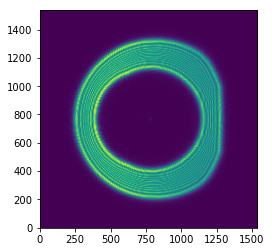

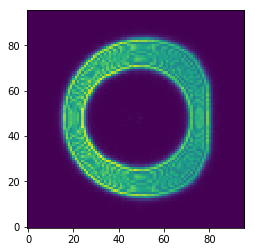

In [6]:
plt.imshow(fftLattice.array)
plt.show()
plt.imshow(hLattice.array)
plt.show()

In [7]:
print(hLattice.primitiveVectors)
print(fftLattice.primitiveVectors)
print(gsLattice.primitiveVectors)

[[-0.24470082927498127 -3.5374215098481146e-18]
 [6.813112923422709e-08 -0.24481033344392183]]
[[-0.01529380182968633 -2.2108884436550716e-19]
 [4.258195577139193e-09 -0.015300645840245115]]
[[-0.01529715 -0.        ]
 [-0.         -0.01529715]]


In [9]:
telescope = lsst.withGloballyShiftedOptic('LSST.LSSTCamera', [0,0,1e-3])
fftLattice, hLattice, gsLattice = psfModelComparison(
    telescope, 0.0, np.deg2rad(1.75), 620e-9,
    nx=1536, pad_factor=1, h_factor=16)

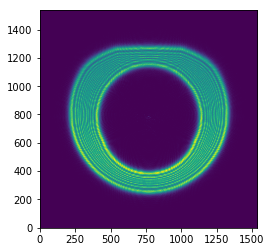

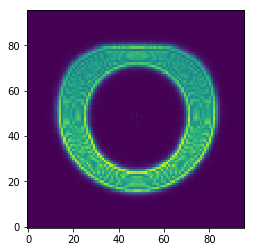

In [10]:
plt.imshow(fftLattice.array)
plt.show()
plt.imshow(hLattice.array)
plt.show()

In [11]:
print(hLattice.primitiveVectors)
print(fftLattice.primitiveVectors)
print(gsLattice.primitiveVectors)

[[-6.816290129697355e-08 -0.24469622261763244]
 [0.2448149422495241 0.0]]
[[-4.260181331060847e-09 -0.015293513913602027]
 [0.015300933890595256 0.0]]
[[-0.01529715 -0.        ]
 [-0.         -0.01529715]]


In [12]:
telescope = decam.withGloballyShiftedOptic('BlancoDECam.DECam', [0,0,2e-3])
fftLattice, hLattice, gsLattice = psfModelComparison(
    telescope, np.deg2rad(1.1), 0.0, 620e-9,
    nx=512, pad_factor=1, h_factor=4)

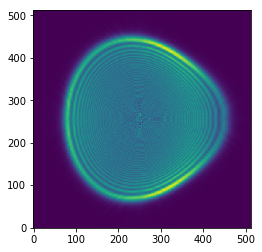

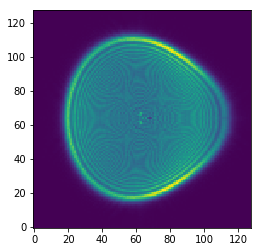

In [13]:
plt.imshow(fftLattice.array)
plt.show()
plt.imshow(hLattice.array)
plt.show()

In [14]:
print(hLattice.primitiveVectors)
print(fftLattice.primitiveVectors)
print(gsLattice.primitiveVectors)

[[-0.13439149212180673 2.397848303857131e-14]
 [1.1838859650655064e-08 -0.13434465262090992]]
[[-0.03359787303045168 5.994620759642828e-15]
 [2.959714912663766e-09 -0.03358616315522748]]
[[-0.0335654 -0.       ]
 [-0.        -0.0335654]]


In [15]:
telescope = hsc.withGloballyShiftedOptic('SubaruHSC.HSC', [0,0,900e-6])
fftLattice, hLattice, gsLattice = psfModelComparison(
    telescope, np.deg2rad(0.74), 0.0, 620e-9,
    nx=512, pad_factor=1, h_factor=4)

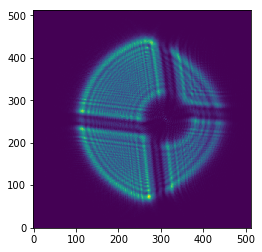

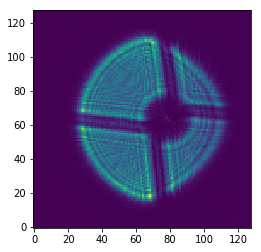

In [16]:
plt.imshow(fftLattice.array)
plt.show()
plt.imshow(hLattice.array)
plt.show()

In [17]:
print(hLattice.primitiveVectors)
print(fftLattice.primitiveVectors)
print(gsLattice.primitiveVectors)

[[-0.0624550168979983 -5.044279783097354e-07]
 [1.6986072027550509e-06 -0.062430145755757754]]
[[-0.015613754224499576 -1.2610699457743386e-07]
 [4.246518006887627e-07 -0.015607536438939439]]
[[-0.01559563 -0.        ]
 [-0.         -0.01559563]]
